In [1]:
# imports 

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler

## Loading Data

In [2]:
#loading salary data

dfSalary = pd.read_csv("Salary.csv")
dfSalary.head()

,First,Last,Salary
0,Stephen,Curry,45780966.0
1,James,Harden,44310840.0
2,John,Wall,44310840.0
3,Russell,Westbrook,44211146.0
4,Kevin,Durant,42018900.0


In [3]:
#loading player stats data

dfPlayer = pd.read_csv("playerStats2021.csv", encoding="latin1", delimiter= ";")
dfPlayer.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,...,0.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1
1,2,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,...,0.543,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9
2,3,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,...,0.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1
3,4,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,...,0.625,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1
4,5,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,...,0.873,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9


In [4]:
#combining data

# creating a common column to join by
dfSalary['Player'] = dfSalary['First'] + " " + dfSalary['Last']

# Merge DataFrames on a common column
dfCombined = pd.merge(dfSalary, dfPlayer, on='Player', how='inner')

# Handle duplicates or missing values if necessary
dfCombined.drop_duplicates(subset=['First', 'Last', 'Salary'], inplace=True)  # Drop duplicate rows
dfCombined.dropna(inplace=True)  # Drop rows with missing values

# drop new row
dfCombined.drop(columns=['Player'], inplace=True)
pd.set_option('display.max_columns', None)
dfCombined.head()

,First,Last,Salary,Rk,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Stephen,Curry,45780966.0,126,PG,33,GSW,64,64,34.5,8.4,19.1,0.437,4.5,11.7,0.380,3.9,7.4,0.527,0.554,4.3,4.7,0.923,0.5,4.7,5.2,6.3,1.3,0.4,3.2,2.0,25.5
1,James,Harden,44310840.0,218,PG-SG,32,TOT,65,65,37.2,6.3,15.3,0.410,2.3,6.9,0.330,4.0,8.4,0.476,0.485,7.2,8.2,0.877,0.8,6.8,7.7,10.3,1.3,0.6,4.4,2.4,22.0
4,Russell,Westbrook,44211146.0,576,PG,33,LAL,78,78,34.3,7.0,15.8,0.444,1.0,3.4,0.298,6.0,12.4,0.485,0.476,3.4,5.1,0.667,1.4,6.0,7.4,7.1,1.0,0.3,3.8,3.0,18.5
5,Kevin,Durant,42018900.0,154,PF,33,BRK,55,55,37.2,10.5,20.3,0.518,2.1,5.5,0.383,8.4,14.8,0.568,0.570,6.8,7.4,0.910,0.5,6.9,7.4,6.4,0.9,0.9,3.5,2.1,29.9
6,LeBron,James,41180544.0,274,SF,37,LAL,56,56,37.2,11.4,21.8,0.524,2.9,8.0,0.359,8.6,13.8,0.620,0.590,4.5,6.0,0.756,1.1,7.1,8.2,6.2,1.3,1.1,3.5,2.2,30.3


In [5]:
# pulling out columns with the highest corr

dfHighCorr = dfCombined[['Salary', 'PTS', 'AST', 'FG', 'FGA', 'TOV']]
dfHighCorr.head()

,Salary,PTS,AST,FG,FGA,TOV
0,45780966.0,25.5,6.3,8.4,19.1,3.2
1,44310840.0,22.0,10.3,6.3,15.3,4.4
4,44211146.0,18.5,7.1,7.0,15.8,3.8
5,42018900.0,29.9,6.4,10.5,20.3,3.5
6,41180544.0,30.3,6.2,11.4,21.8,3.5


## Linear Regression

In [6]:
# looking at the MSE - just linear 

y = dfHighCorr['Salary']
X = dfHighCorr.drop(columns=['Salary'])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the training set
train_predictions = model.predict(X_train)

# Calculate MSE on training set
train_error = mean_squared_error(y_train, train_predictions)
print("MSE on training set:", train_error)

# Make predictions on the testing set
test_predictions = model.predict(X_test)

# Calculate MSE on testing set
test_error = mean_squared_error(y_test, test_predictions)
print("MSE on test set:", test_error)

# Calculate Root Mean Squared Error on training set
train_rmse = np.sqrt(train_error)
print("Root Mean Squared Error on training set:", train_rmse)

# Calculate Root Mean Squared Error on testing set
test_rmse = np.sqrt(test_error)
print("Root Mean Squared Error on testing set:", test_rmse)

# Convert regression output to binary classification
threshold = y_train.median()  # Use median salary as the threshold

# Convert actual and predicted salaries to binary values
y_test_class = (y_test > threshold).astype(int)
y_pred_class = (test_predictions > threshold).astype(int)

# Calculate accuracy for the binary classification
accuracy = accuracy_score(y_test_class, y_pred_class)
print(f'Classification Accuracy: {accuracy}')

MSE on training set: 29875942765005.33
MSE on test set: 57309381653090.195
Root Mean Squared Error on training set: 5465889.018723791
Root Mean Squared Error on testing set: 7570296.0082872715
Classification Accuracy: 0.7924528301886793


#### Results
- This is a basline for the logistical regression, we can see that the model had a RMSE of about 7.5 million. The goal will be to lower this but currently the range of salaries is about 20,000 to 45 Million

## Logistical Regression - Polynomial Degree

In [7]:
# looking at the MSE - with a poly degree

y = dfHighCorr['Salary']
X = dfHighCorr.drop(columns=['Salary'])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the degree of the polynomial features
degree = 2

# Generate polynomial features
poly_features = PolynomialFeatures(degree=degree)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the training set
train_predictions = model.predict(X_train)

# Calculate MSE on training set
train_error = mean_squared_error(y_train, train_predictions)
print("MSE on training set:", train_error)

# Make predictions on the testing set
test_predictions = model.predict(X_test)

# Calculate MSE on testing set
test_error = mean_squared_error(y_test, test_predictions)
print("MSE on test set:", test_error)

# Calculate Root Mean Squared Error on training set
train_rmse = np.sqrt(train_error)
print("Root Mean Squared Error on training set:", train_rmse)

# Calculate Root Mean Squared Error on testing set
test_rmse = np.sqrt(test_error)
print("Root Mean Squared Error on testing set:", test_rmse)

# Convert regression output to binary classification
threshold = y_train.median()  # Use median salary as the threshold

# Convert actual and predicted salaries to binary values
y_test_class = (y_test > threshold).astype(int)
y_pred_class = (test_predictions > threshold).astype(int)

# Calculate accuracy for the binary classification
accuracy = accuracy_score(y_test_class, y_pred_class)
print(f'Classification Accuracy: {accuracy}')

MSE on training set: 29875942765005.33
MSE on test set: 57309381653090.195
Root Mean Squared Error on training set: 5465889.018723791
Root Mean Squared Error on testing set: 7570296.0082872715
Classification Accuracy: 0.7924528301886793


#### Results
- Above we just added a polynomial degree. Based on the RMSE the polynomial degree didn't have any effect on the results. I think that the range of player salaries may be too large

## Scaling Data

In [8]:
# scaling data using min max scaler

# Initialize the scaler
scaler = MinMaxScaler()
scaler.fit(dfHighCorr)
# Fit the scaler to the data and transform the data
dfScaled = scaler.transform(dfHighCorr)
scaled_df = pd.DataFrame(dfScaled, columns=dfHighCorr.columns)
scaled_df.head()

,Salary,PTS,AST,FG,FGA,TOV
0,1.000000,0.833333,0.583333,0.736842,0.876147,0.727273
1,0.967879,0.718954,0.953704,0.552632,0.701835,1.000000
2,0.965700,0.604575,0.657407,0.614035,0.724771,0.863636
3,0.917801,0.977124,0.592593,0.921053,0.931193,0.795455
4,0.899483,0.990196,0.574074,1.000000,1.000000,0.795455


## Logistical Regression - Polynomial Degree and Scaled

In [9]:
# looking at the MSE - with a poly degree and scaled data

y = scaled_df['Salary']
X = scaled_df.drop(columns=['Salary'])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the degree of the polynomial features
degree = 2  

# Generate polynomial features
poly_features = PolynomialFeatures(degree=degree)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the training set
train_predictions = model.predict(X_train)

# Calculate MSE on training set
train_error = mean_squared_error(y_train, train_predictions)
print("MSE on training set:", train_error)

# Make predictions on the testing set
test_predictions = model.predict(X_test)

# Calculate MSE on testing set
test_error = mean_squared_error(y_test, test_predictions)
print("MSE on test set:", test_error)

# Calculate Root Mean Squared Error on training set
train_rmse = np.sqrt(train_error)
print("Root Mean Squared Error on training set:", train_rmse)

# Calculate Root Mean Squared Error on testing set
test_rmse = np.sqrt(test_error)
print("Root Mean Squared Error on testing set:", test_rmse)

# Convert regression output to binary classification
threshold = y_train.median()  # Use median salary as the threshold

# Convert actual and predicted salaries to binary values
y_test_class = (y_test > threshold).astype(int)
y_pred_class = (test_predictions > threshold).astype(int)

# Calculate accuracy for the binary classification
accuracy = accuracy_score(y_test_class, y_pred_class)
print(f'Classification Accuracy: {accuracy}')

MSE on training set: 0.014262773126819875
MSE on test set: 0.027359495062153984
Root Mean Squared Error on training set: 0.11942685262042149
Root Mean Squared Error on testing set: 0.16540705868297756
Classification Accuracy: 0.7924528301886793


#### Results 
- It is hard to compared scaled results to previous results so this will act as a basline for the following scaled regressions

## Looking at Distributions

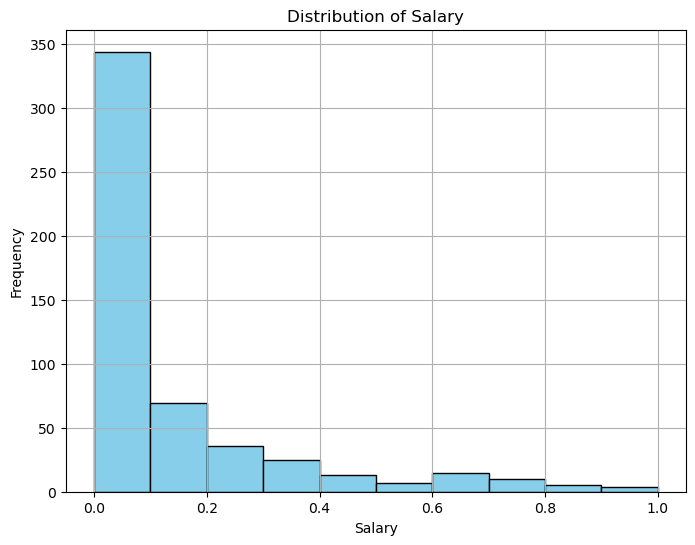

In [10]:
# Plotting the distribution of salaries - data scaled
plt.figure(figsize=(8, 6))
plt.hist(scaled_df['Salary'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

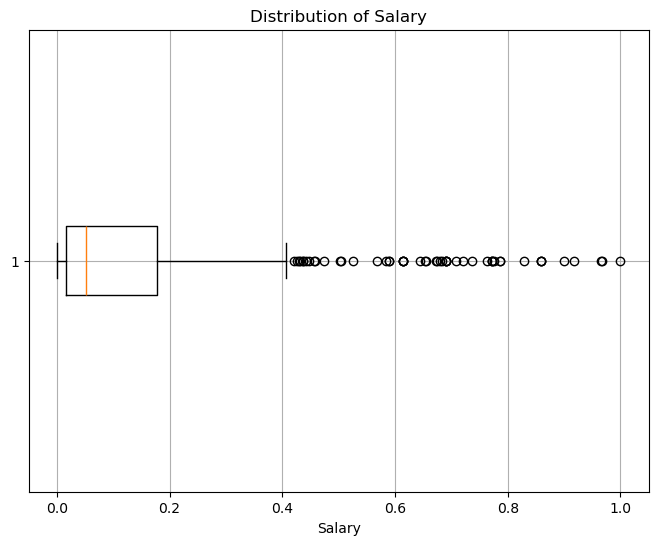

In [11]:
# Creating a box plot of the distribution of salaries
plt.figure(figsize=(8, 6))
plt.boxplot(scaled_df['Salary'], vert=False)
plt.title('Distribution of Salary')
plt.xlabel('Salary')
plt.grid(True)
plt.show()

## Removing Higher Salaries and Redistributing

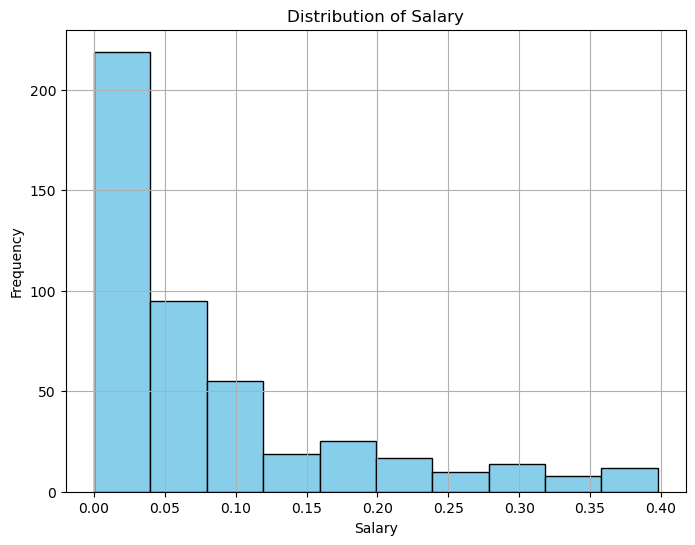

In [12]:
# ajusting df to handle high salaries
# removing all salaries greater than 0.4

maxSal = 0.4

modSalDF = scaled_df[scaled_df['Salary'] <= maxSal]

# Plotting the distribution of salaries - modSal
plt.figure(figsize=(8, 6))
plt.hist(modSalDF['Salary'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#### Reasoning
- Based on the distributions we can see that the amount of players with the high end salaries is very minimal. This may be why our model doesn't predict very well. The amount of training data on high salary players is minimal. That being said it makes sense to modify the salarys such that the range is smaller.

## Logistical Regression - Polynomial Degree, Scaled Data, Salaries Modified

In [13]:
# Testing the MSE with the salary modified

# looking at the MSE - with a poly degree and scaled data and salaries modified

y = modSalDF['Salary']
X = modSalDF.drop(columns=['Salary'])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the degree of the polynomial features
degree = 2  

# Generate polynomial features
poly_features = PolynomialFeatures(degree=degree)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the training set
train_predictions = model.predict(X_train)

# Calculate MSE on training set
train_error = mean_squared_error(y_train, train_predictions)
print("MSE on training set:", train_error)

# Make predictions on the testing set
test_predictions = model.predict(X_test)

# Calculate MSE on testing set
test_error = mean_squared_error(y_test, test_predictions)
print("MSE on test set:", test_error)

# Calculate Root Mean Squared Error on training set
train_rmse = np.sqrt(train_error)
print("Root Mean Squared Error on training set:", train_rmse)

# Calculate Root Mean Squared Error on testing set
test_rmse = np.sqrt(test_error)
print("Root Mean Squared Error on testing set:", test_rmse)

# Convert regression output to binary classification
threshold = y_train.median()  # Use median salary as the threshold

# Convert actual and predicted salaries to binary values
y_test_class = (y_test > threshold).astype(int)
y_pred_class = (test_predictions > threshold).astype(int)

# Calculate accuracy for the binary classification
accuracy = accuracy_score(y_test_class, y_pred_class)
print(f'Classification Accuracy: {accuracy}')

MSE on training set: 0.005826143115992264
MSE on test set: 0.006091757279201295
Root Mean Squared Error on training set: 0.07632917604685815
Root Mean Squared Error on testing set: 0.0780497103082471
Classification Accuracy: 0.7368421052631579


#### Results
- When looking at our scaled baseline we can see that the model was greatly improved by making the salary range smaller. Now we must try this model on the unscaled data inorder to get a more meaningful value.

## Logistical Regression - Polynomial Degree, Salaries Modified

In [14]:
q1 = np.percentile(dfHighCorr['Salary'], 25)
q3 = np.percentile(dfHighCorr['Salary'], 75)
iqr = q3 - q1

# Calculate upperOutlier
upperOutlier = q3 + 1.5 * iqr

maxSal = upperOutlier

modUnScaled = dfHighCorr[dfHighCorr['Salary'] <= maxSal]

# Calculating MSE using poly degree and shortening the salary range on unscaled data

y = modUnScaled['Salary']
X = modUnScaled.drop(columns=['Salary'])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the degree of the polynomial features
degree = 2  

# Generate polynomial features
poly_features = PolynomialFeatures(degree=degree)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the training set
train_predictions = model.predict(X_train)

# Calculate MSE on training set
train_error = mean_squared_error(y_train, train_predictions)
print("MSE on training set:", train_error)

# Make predictions on the testing set
test_predictions = model.predict(X_test)

# Calculate MSE on testing set
test_error = mean_squared_error(y_test, test_predictions)
print("MSE on test set:", test_error)

# Calculate Root Mean Squared Error on training set
train_rmse = np.sqrt(train_error)
print("Root Mean Squared Error on training set:", train_rmse)

# Calculate Root Mean Squared Error on testing set
test_rmse = np.sqrt(test_error)
print("Root Mean Squared Error on testing set:", test_rmse)

# Convert regression output to binary classification
threshold = y_train.median()  # Use median salary as the threshold

# Convert actual and predicted salaries to binary values
y_test_class = (y_test > threshold).astype(int)
y_pred_class = (test_predictions > threshold).astype(int)

# Calculate accuracy for the binary classification
accuracy = accuracy_score(y_test_class, y_pred_class)
print(f'Classification Accuracy: {accuracy}')

MSE on training set: 12099389931622.232
MSE on test set: 14895553486936.084
Root Mean Squared Error on training set: 3478417.733916131
Root Mean Squared Error on testing set: 3859475.804683336
Classification Accuracy: 0.7395833333333334


## Results
- When looking at the new results the model produced a RMSE of about 3.8 Million. Our original model produced a RMSE of about 7.5 Million. Throughout this processes the model has improved by nearly 50%, however the accuracy of the model got worse by 6 points.